# Player Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [3]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [4]:
folder_path = '~/Documents/GAA Analytics/2024/'

In [5]:
df = pd.read_excel(folder_path + "Football_Championship_Combined_xPoint.xlsx")

In [6]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
1665,588,161,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,70,point,Score,James Conlon,13,forward,right,n,39.06,38.304598,51.650946,106.695402,36.349054,1,1,0,3,0,11.295588,0,0.490695
1666,589,163,2024-06-16,All Ireland Group R3,Meath,Monaghan,2nd,70,point,Score,Eoghan Frayne,15,forward,right,n,47.85,45.109951,59.974441,99.890049,28.025559,1,1,0,3,0,19.500191,0,0.318251
1667,590,160,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,70,wide,Miss,Conor McCarthy,7,back,left,y,15.40,138.639939,58.026389,138.639939,58.026389,0,1,1,1,1,-65.608780,0,0.715099
1668,591,162,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,70,post,Miss,Micheal Bannigan,11,forward,hand,y,10.87,143.525834,33.233001,143.525834,33.233001,0,1,1,3,2,82.203811,0,0.786621
1669,592,164,2024-06-16,All Ireland Group R3,Monaghan,Meath,2nd,70,free,Score,Conor McManus,15,forward,right,n,23.06,130.613112,25.972080,130.613112,25.972080,1,1,0,3,0,51.408953,1,0.904626


## Compare xPoints with Actual Points per Player

In [7]:
tm = df.groupby('PlayerName').count()

tm = tm[['Action']]
tm = tm.reset_index()
tm1 = df.groupby(['PlayerName', 'TeamName']).sum()

tm1 = tm1.reset_index()

tm1 = tm1[['PlayerName', 'TeamName', 'xP_adv', 'Score']]

merged_df = pd.merge(tm, tm1, on='PlayerName')

md = merged_df.rename(columns={'Action': 'Shots'})
md = md.rename(columns={'xP_adv': 'xP'})

md = md[['PlayerName', 'TeamName', 'Shots', 'Score', 'xP']]

# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Score'] - md['xP']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)

md = md.sort_values(by='Shots', ascending=False)

md1 = md.head(20)

md1 = md1.sort_values(by='Difference', ascending=False)

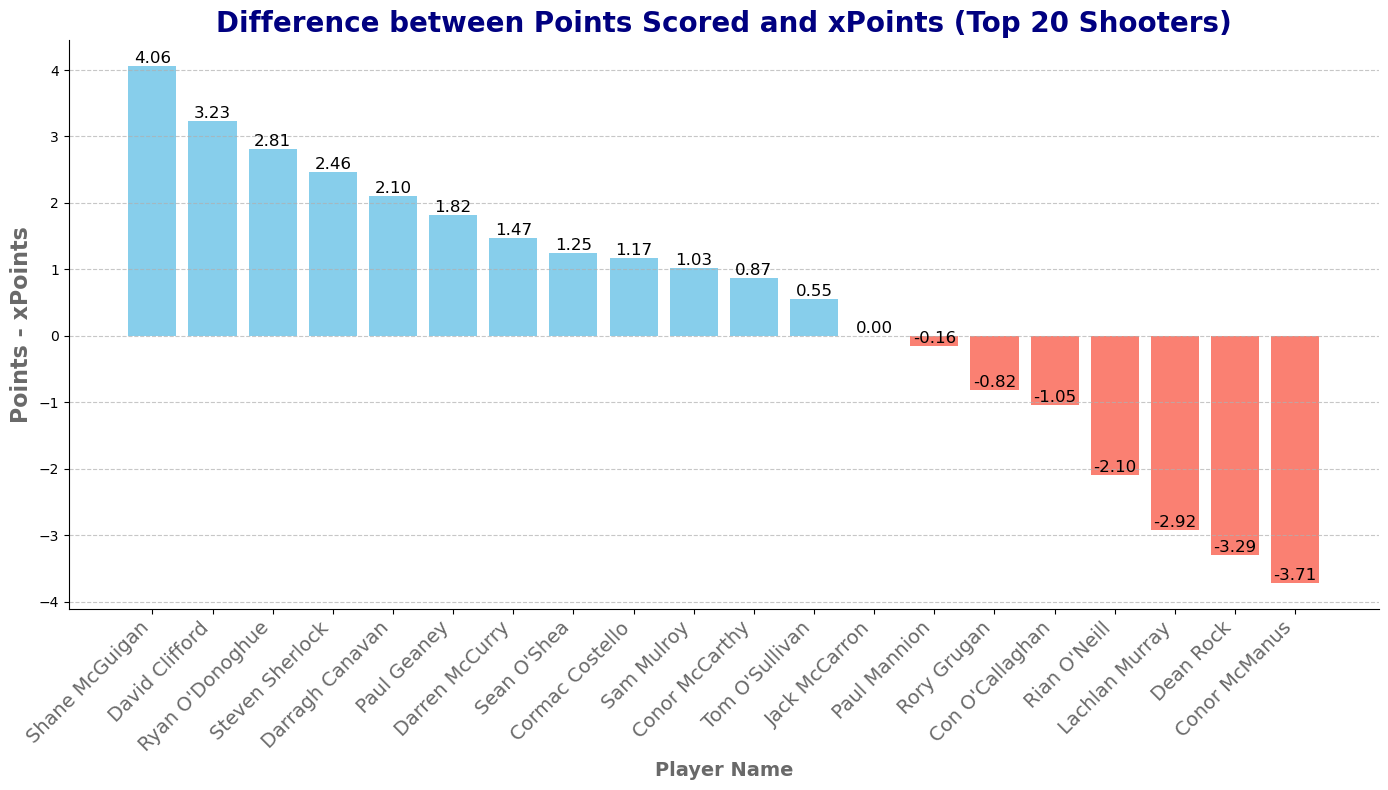

In [8]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 8))

# Choose color palette
colors = ['skyblue' if x > 0 else 'salmon' for x in md1['Difference']]

# Plot the bar chart with customized colors
bars = plt.bar(range(len(md1)), md1['Difference'], color=colors)

# Add labels to each bar with improved formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height),
             ha='center', va='bottom', fontsize=12, color='black' if height > 0 else 'black')

# Set the title and labels with enhanced font styles
plt.title('Difference between Points Scored and xPoints (Top 20 Shooters)', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Player Name', fontsize=14, fontweight='bold', color='dimgray')
plt.ylabel('Points - xPoints', fontsize=16, fontweight='bold', color='dimgray')

# Set the x-axis labels with rotation and alignment
plt.xticks(range(len(md1)), md1['PlayerName'], rotation=45, ha='right', fontsize=14, color='dimgray')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.savefig('difference_player_xpoints.png', dpi=300, bbox_inches='tight')

# Show plot with tight layout
plt.tight_layout()
plt.show()


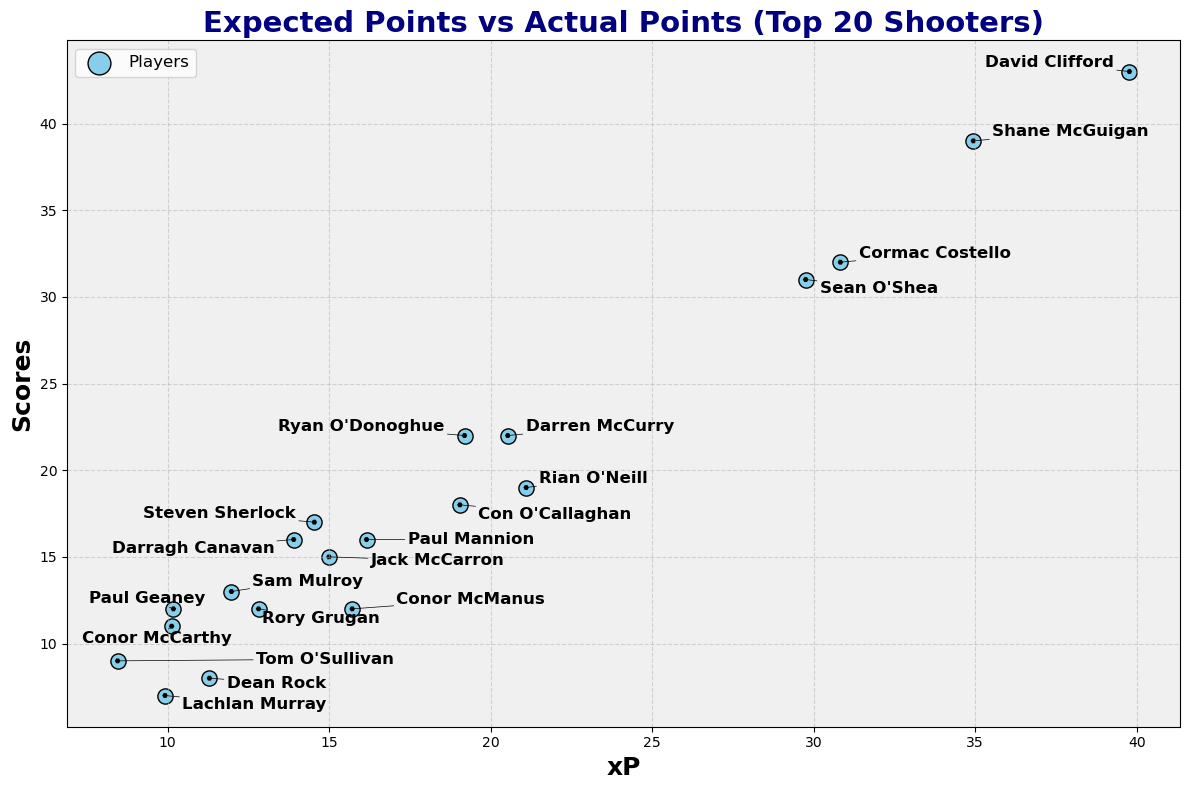

In [9]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(12, 8))  # Set the size of the figure

# Adjust the size and color of the scatter points, and set marker style
scatter = plt.scatter(md1['xP'], md1['Score'], s=120, c='skyblue', marker='o', edgecolors='black') 

texts = []
for i, name in enumerate(md1['PlayerName']):
    x = md1['xP'].iloc[i]
    y = md1['Score'].iloc[i]
    # Increase label font size by 50%, and set font weight to bold
    text = plt.text(x, y, name, ha='center', va='center', fontsize=8*1.5, fontweight='bold', color='black')
    texts.append(text)

# Set labels and title with increased font size and styling
plt.xlabel('xP', fontsize=12*1.5, fontweight='bold', color='black')
plt.ylabel('Scores', fontsize=12*1.5, fontweight='bold', color='black')
plt.title('Expected Points vs Actual Points (Top 20 Shooters)', fontsize=14*1.5, fontweight='bold', color='navy')

# Add arrows to the points
plt.quiver(md1['xP'], md1['Score'], 0, 0, angles='xy', scale_units='xy', scale=1, width=0.005, color='black')

# Adjust the positions of labels to avoid overlap and increase spacing between points
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5), expand_points=(1.2, 1.2))

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Players'], loc='upper left', fontsize=12, markerscale=1.5)

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Display the plot
plt.tight_layout()
plt.show()

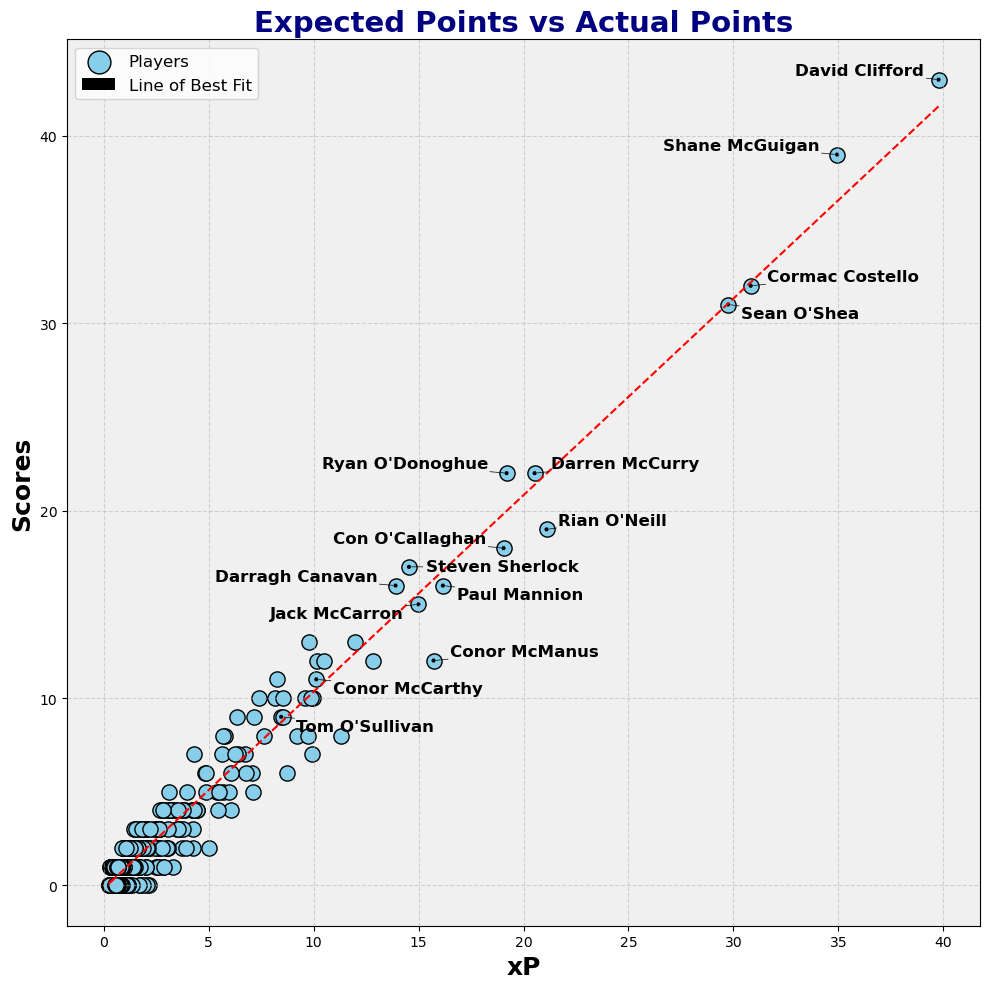

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

plt.figure(figsize=(10, 10))  # Set the size of the figure

# Sort the DataFrame by the number of shots in descending order
md_sorted = md.sort_values(by='Shots', ascending=False)

# Select top 10 players
top_players = md_sorted.head(15)

# Adjust the size and color of the scatter points, and set marker style
scatter = plt.scatter(md['xP'], md['Score'], s=120, c='skyblue', marker='o', edgecolors='black')

texts = []
for i, name in enumerate(top_players['PlayerName']):
    x = top_players['xP'].iloc[i]
    y = top_players['Score'].iloc[i]
    # Increase label font size by 50%, and set font weight to bold
    text = plt.text(x, y, name, ha='center', va='center', fontsize=8*1.5, fontweight='bold', color='black')
    texts.append(text)
    # Add arrows only to the top 10 players' points
    plt.quiver(x, y, 0, 0, angles='xy', scale_units='xy', scale=1, width=0.005, color='black')

# Calculate and plot the line of best fit
coefficients = np.polyfit(md['xP'], md['Score'], 1)
line = np.poly1d(coefficients)
plt.plot(md['xP'], line(md['xP']), color='red', linestyle='--', label='Line of Best Fit')

# Set labels and title with increased font size and styling
plt.xlabel('xP', fontsize=12*1.5, fontweight='bold', color='black')
plt.ylabel('Scores', fontsize=12*1.5, fontweight='bold', color='black')
plt.title('Expected Points vs Actual Points', fontsize=14*1.5, fontweight='bold', color='navy')

# Adjust the positions of labels to avoid overlap and increase spacing between points
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5), expand_points=(1.2, 1.2))

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Players', 'Line of Best Fit'], loc='upper left', fontsize=12, markerscale=1.5)

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Display the plot
plt.tight_layout()

#plt.savefig('xP_vs_actual_points_plot.png', dpi=300, bbox_inches='tight')


plt.show()


### Standardise - Divide xPoints and Points by the Shots

In [11]:
md['Points_per_Shot'] = md.Score / md.Shots
md['xPoints_per_Shot'] = md.xP / md.Shots

### Average xPoint per Shot per Player

In [12]:
md.sort_values(by='xPoints_per_Shot', ascending=False)

# Calculate the standard difference between md.Score and md.xPoints
md['Std_Difference'] = md['Points_per_Shot'] - md['xPoints_per_Shot']

# Sort the DataFrame by the 'Shot' column in descending order
md = md.sort_values(by='Shots', ascending=False)

md2 = md.head(20)

md2 = md2.sort_values(by='Std_Difference', ascending=False)

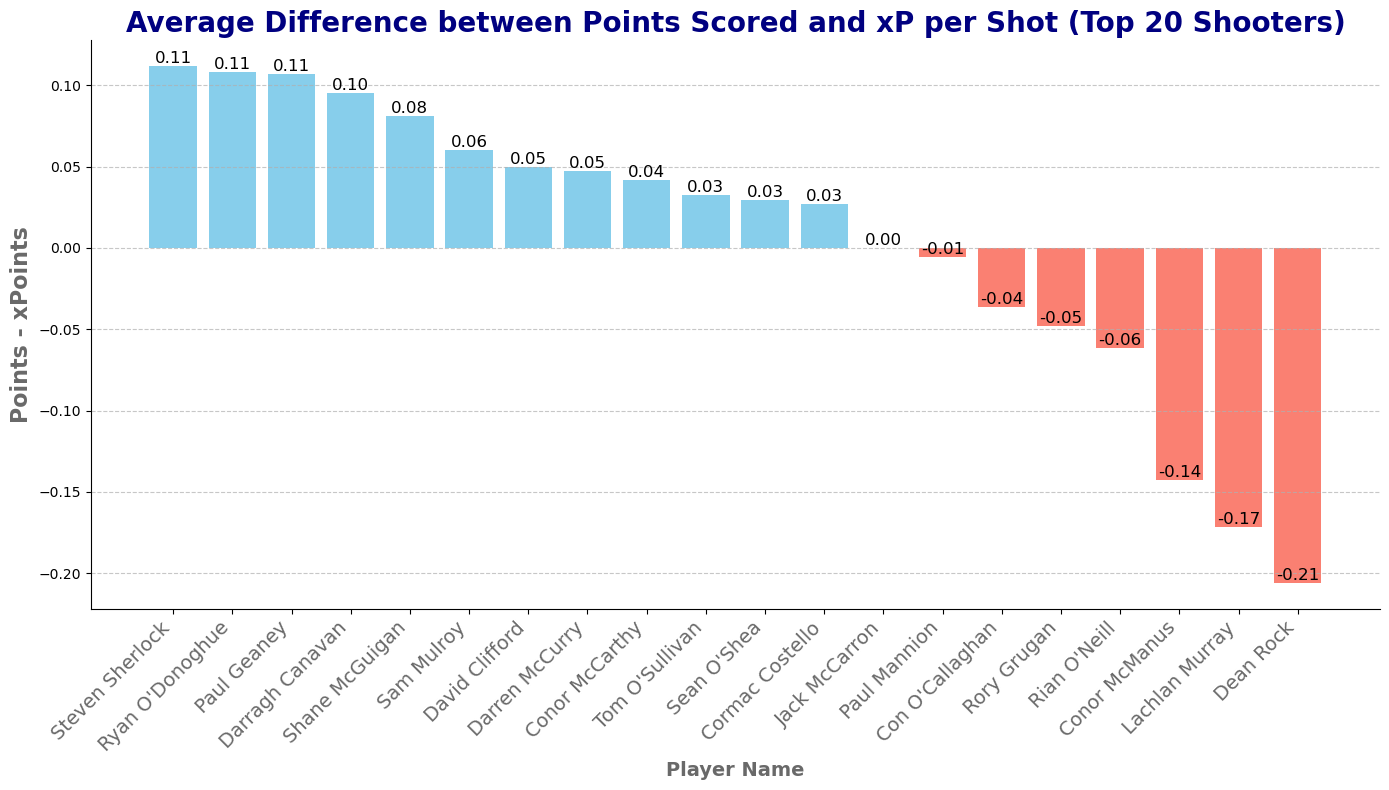

In [13]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Choose color palette
colors = ['skyblue' if x > 0 else 'salmon' for x in md2['Std_Difference']]

# Plot the bar chart with customized colors
bars = plt.bar(range(len(md2)), md2['Std_Difference'], color=colors)

# Add labels to each bar with improved formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height),
             ha='center', va='bottom', fontsize=12, color='black' if height > 0 else 'black')

# Set the title and labels with enhanced font styles
plt.title('Average Difference between Points Scored and xP per Shot (Top 20 Shooters)', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Player Name', fontsize=14, fontweight='bold', color='dimgray')
plt.ylabel('Points - xPoints', fontsize=16, fontweight='bold', color='dimgray')

# Set the x-axis labels with rotation and alignment
plt.xticks(range(len(md2)), md2['PlayerName'], rotation=45, ha='right', fontsize=14, color='dimgray')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.savefig('difference_player_xpoints_per_shot.png', dpi=300, bbox_inches='tight')

# Show plot with tight layout
plt.tight_layout()
plt.show()


### Average xP per Game per Player

In [14]:
games = df.groupby(['Game', 'TeamName', 'Opposition']).sum()

team_counts = games.groupby('TeamName').count()


# Sort the grouped data by count in descending order
ts = team_counts.sort_values(by='Minute', ascending=False)

ts = ts[['Minute']]

ts = ts.reset_index()

ts = ts.rename(columns={"Minute": "Games_Count"})

ts

,TeamName,Games_Count
0,Kerry,8
1,Derry,7
2,Dublin,7
3,Monaghan,7
4,Armagh,5
5,Mayo,5
6,Tyrone,5
7,Cork,4
8,Galway,3
9,Roscommon,2


In [15]:
ppg = pd.merge(md, ts, on='TeamName')

In [16]:
#### Standardise - Divide xPoints and Points by the Game

ppg['Points_per_Game'] = ppg.Score / ppg.Games_Count

ppg['xPoints_per_Game'] = ppg.xP / ppg.Games_Count

#### Average xPoint per Game per Player

ppg.sort_values(by='xPoints_per_Game', ascending=False)

# Calculate the standard difference between ppg.Score and ppg.xPoints
ppg['Game_Difference'] = ppg['Points_per_Game'] - ppg['xPoints_per_Game']

# Sort the DataFrame by the 'Difference' column in descending order
ppg = ppg.sort_values(by='Game_Difference', ascending=False)

ppg = ppg.sort_values(by='Shots', ascending=False)

ppg1 = ppg.copy()

ppg = ppg.head(20)

ppg = ppg.sort_values(by='Game_Difference', ascending=False)


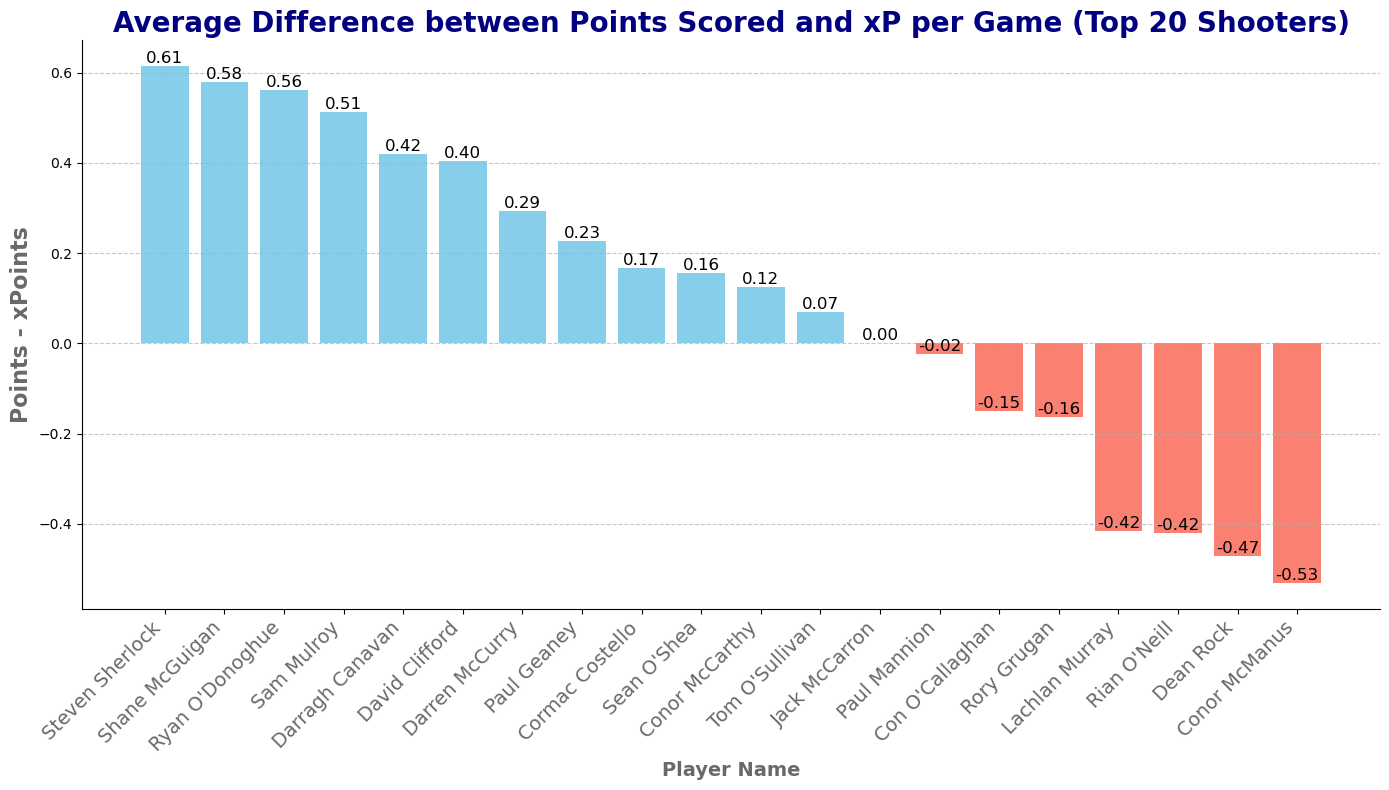

In [17]:

# Set the figure size
plt.figure(figsize=(14, 8))

# Choose color palette
colors = ['skyblue' if x > 0 else 'salmon' for x in ppg['Game_Difference']]

# Plot the bar chart with customized colors
bars = plt.bar(range(len(ppg)), ppg['Game_Difference'], color=colors)

# Add labels to each bar with improved formatting
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height),
             ha='center', va='bottom', fontsize=12, color='black' if height > 0 else 'black')

# Set the title and labels with enhanced font styles
plt.title('Average Difference between Points Scored and xP per Game (Top 20 Shooters)', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Player Name', fontsize=14, fontweight='bold', color='dimgray')
plt.ylabel('Points - xPoints', fontsize=16, fontweight='bold', color='dimgray')

# Set the x-axis labels with rotation and alignment
plt.xticks(range(len(ppg)), ppg['PlayerName'], rotation=45, ha='right', fontsize=14, color='dimgray')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.savefig('difference_player_xpoints_per_game.png', dpi=300, bbox_inches='tight')

# Show plot with tight layout
plt.tight_layout()
plt.show()


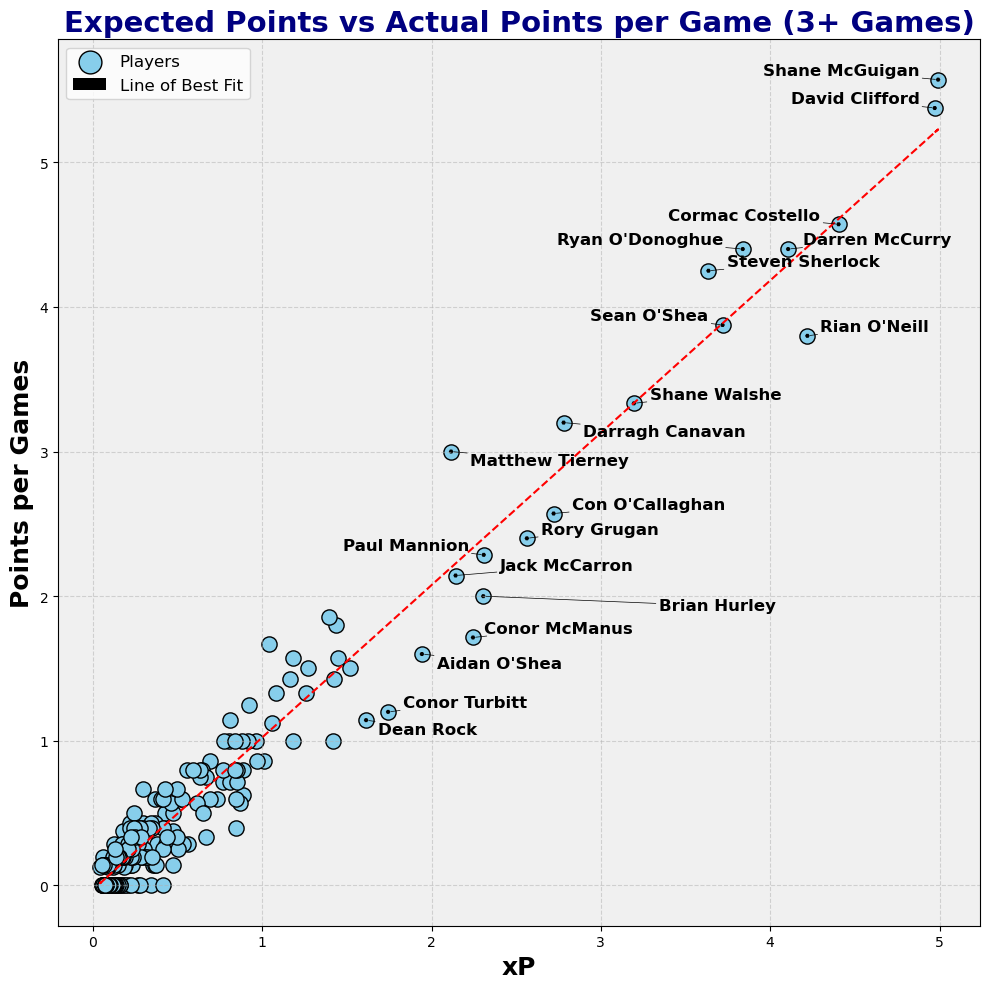

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

plt.figure(figsize=(10, 10))  # Set the size of the figure

ppg1 = ppg1[ppg1['Games_Count'] > 2]

# Sort the DataFrame by the number of shots in descending order
ppg1_sorted = ppg1.sort_values(by='xPoints_per_Game', ascending=False)

# Select top 10 players
top_players = ppg1_sorted.head(20)

# Adjust the size and color of the scatter points, and set marker style
scatter = plt.scatter(ppg1['xPoints_per_Game'], ppg1['Points_per_Game'], s=120, c='skyblue', marker='o', edgecolors='black')

texts = []
for i, name in enumerate(top_players['PlayerName']):
    x = top_players['xPoints_per_Game'].iloc[i]
    y = top_players['Points_per_Game'].iloc[i]
    # Increase label font size by 50%, and set font weight to bold
    text = plt.text(x, y, name, ha='center', va='center', fontsize=8*1.5, fontweight='bold', color='black')
    texts.append(text)
    # Add arrows only to the top 10 players' points
    plt.quiver(x, y, 0, 0, angles='xy', scale_units='xy', scale=1, width=0.005, color='black')

# Calculate and plot the line of best fit
coefficients = np.polyfit(ppg1['xPoints_per_Game'], ppg1['Points_per_Game'], 1)
line = np.poly1d(coefficients)
plt.plot(ppg1['xPoints_per_Game'], line(ppg1['xPoints_per_Game']), color='red', linestyle='--', label='Line of Best Fit')

# Set labels and title with increased font size and styling
plt.xlabel('xP', fontsize=12*1.5, fontweight='bold', color='black')
plt.ylabel('Points per Games', fontsize=12*1.5, fontweight='bold', color='black')
plt.title('Expected Points vs Actual Points per Game (3+ Games)', fontsize=14*1.5, fontweight='bold', color='navy')

# Adjust the positions of labels to avoid overlap and increase spacing between points
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5), expand_points=(1.2, 1.2))

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Players', 'Line of Best Fit'], loc='upper left', fontsize=12, markerscale=1.5)

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Display the plot
plt.tight_layout()

#plt.savefig('xpoints_per_game_vs_actual_points.png', dpi=300, bbox_inches='tight')


plt.show()


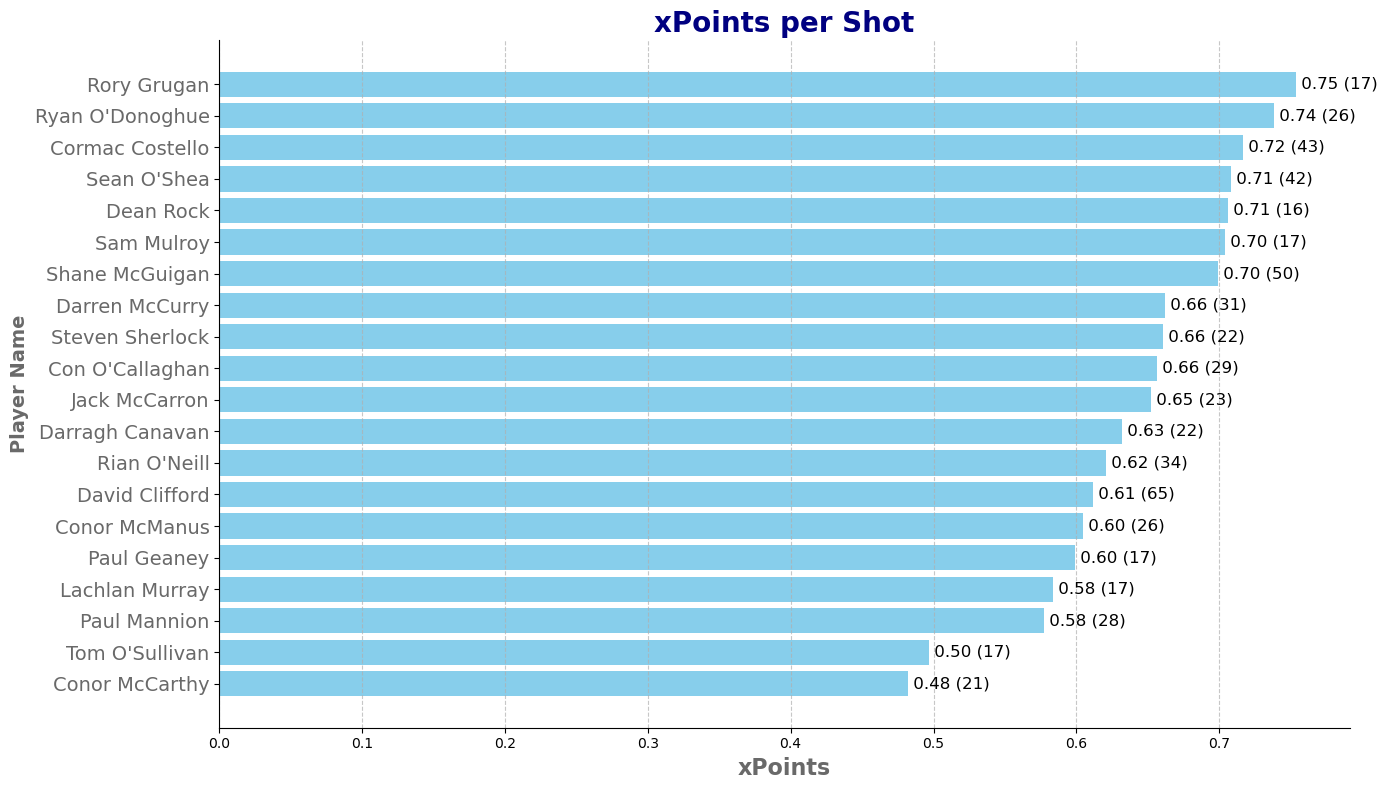

In [19]:
plt.figure(figsize=(14, 8))

# Choose color for all bars
color = 'skyblue'

# Sort the DataFrame by 'xPoints_per_Shot' column in descending order
ppg_sorted = ppg.sort_values(by='xPoints_per_Shot', ascending=False)

# Plot the bar chart with customized colors
bars = plt.barh(range(len(ppg_sorted)), ppg_sorted['xPoints_per_Shot'], color=color)

# Add labels to each bar with improved formatting
for i, bar in enumerate(bars):
    width = bar.get_width()
    num_shots = ppg_sorted.iloc[i]['Shots']
    plt.text(width, bar.get_y() + bar.get_height() / 2, ' {:.2f} ({})'.format(width, num_shots),
             ha='left', va='center', fontsize=12, color='black' if width > 0 else 'black')

# Set the title and labels with enhanced font styles
plt.title('xPoints per Shot', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('xPoints', fontsize=16, fontweight='bold', color='dimgray')
plt.ylabel('Player Name', fontsize=14, fontweight='bold', color='dimgray')

# Set the y-axis labels with alignment
plt.yticks(range(len(ppg_sorted)), ppg_sorted['PlayerName'], fontsize=14, color='dimgray')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Invert y-axis to order bars from highest to lowest
plt.gca().invert_yaxis()



# Show plot with tight layout
plt.tight_layout()

#plt.savefig('xp_per_shot_per_player.png', dpi=300, bbox_inches='tight')
plt.show()


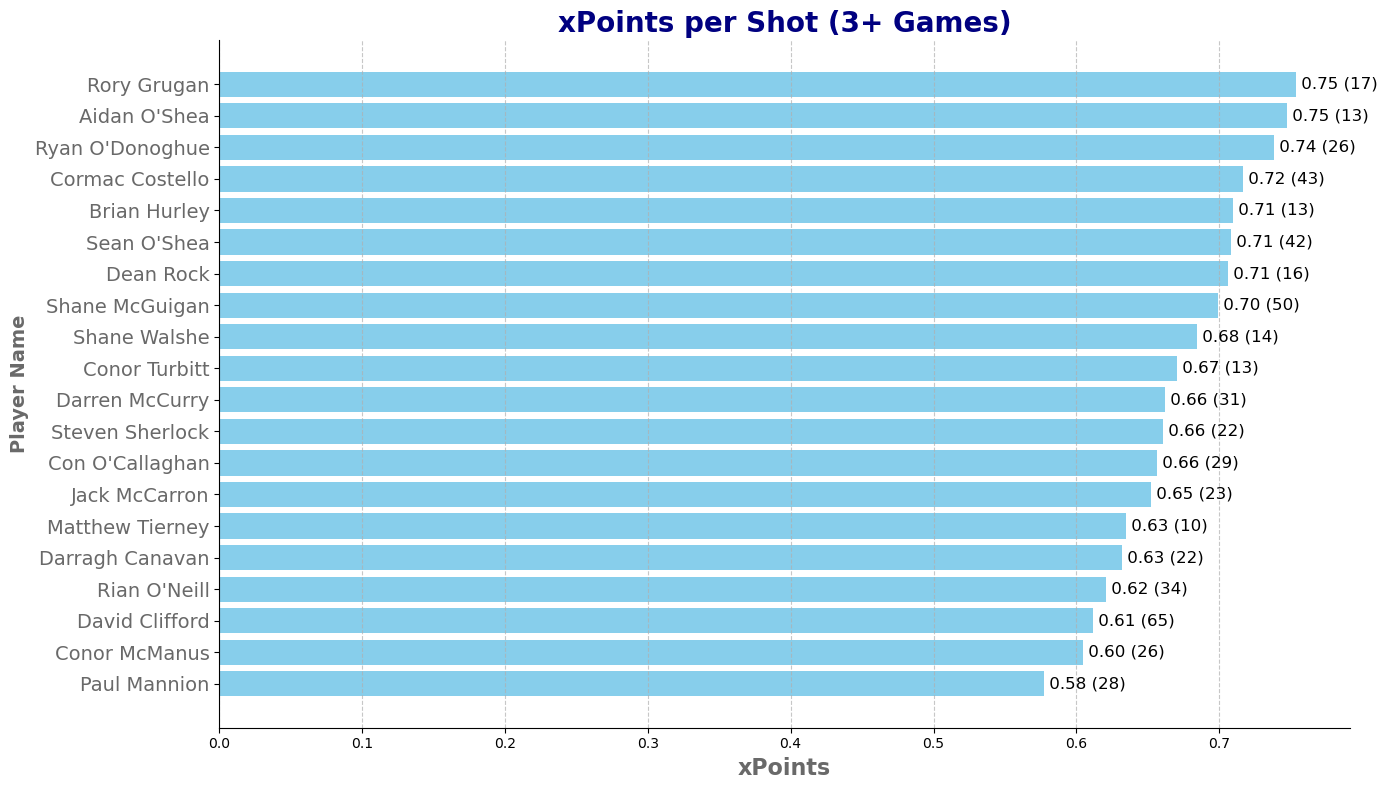

In [20]:
plt.figure(figsize=(14, 8))

# Choose color for all bars
color = 'skyblue'

ppg1 = ppg1[ppg1['Games_Count'] > 2]

# Sort the DataFrame by the number of shots in descending order
ppg1_sorted = ppg1.sort_values(by='xPoints_per_Game', ascending=False)

# Select top 10 players
top_players = ppg1_sorted.head(20)

# Sort the DataFrame by 'xPoints_per_Shot' column in descending order
ppg_sorted = top_players.sort_values(by='xPoints_per_Shot', ascending=False)

# Plot the bar chart with customized colors
bars = plt.barh(range(len(ppg_sorted)), ppg_sorted['xPoints_per_Shot'], color=color)

# Add labels to each bar with improved formatting
for i, bar in enumerate(bars):
    width = bar.get_width()
    num_shots = ppg_sorted.iloc[i]['Shots']
    plt.text(width, bar.get_y() + bar.get_height() / 2, ' {:.2f} ({})'.format(width, num_shots),
             ha='left', va='center', fontsize=12, color='black' if width > 0 else 'black')

# Set the title and labels with enhanced font styles
plt.title('xPoints per Shot (3+ Games)', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('xPoints', fontsize=16, fontweight='bold', color='dimgray')
plt.ylabel('Player Name', fontsize=14, fontweight='bold', color='dimgray')

# Set the y-axis labels with alignment
plt.yticks(range(len(ppg_sorted)), ppg_sorted['PlayerName'], fontsize=14, color='dimgray')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Invert y-axis to order bars from highest to lowest
plt.gca().invert_yaxis()



# Show plot with tight layout
plt.tight_layout()

#plt.savefig('xp_per_shot_per_player.png', dpi=300, bbox_inches='tight')
plt.show()


# Player Comparison

In [21]:
md

,PlayerName,TeamName,Shots,Score,xP,Difference,Points_per_Shot,xPoints_per_Shot,Std_Difference
88,David Clifford,Kerry,65,43,39.773386,3.226614,0.661538,0.611898,0.049640
287,Shane McGuigan,Derry,50,39,34.941809,4.058191,0.780000,0.698836,0.081164
68,Cormac Costello,Dublin,43,32,30.826607,1.173393,0.744186,0.716898,0.027288
281,Sean O'Shea,Kerry,42,31,29.750928,1.249072,0.738095,0.708355,0.029740
248,Rian O'Neill,Armagh,34,19,21.098327,-2.098327,0.558824,0.620539,-0.061716
86,Darren McCurry,Tyrone,31,22,20.529532,1.470468,0.709677,0.662243,0.047434
50,Con O'Callaghan,Dublin,29,18,19.047280,-1.047280,0.620690,0.656803,-0.036113
241,Paul Mannion,Dublin,28,16,16.157855,-0.157855,0.571429,0.577066,-0.005638
63,Conor McManus,Monaghan,26,12,15.713868,-3.713868,0.461538,0.604380,-0.142841
267,Ryan O'Donoghue,Mayo,26,22,19.190175,2.809825,0.846154,0.738084,0.108070


In [22]:
md = md.rename(columns={'Action': 'Shots'})
md = md.rename(columns={'Score': 'Points'})
md = md.rename(columns={'Std_Difference': 'xPPS Difference'})
md = md.rename(columns={'xPoints_per_Shot': 'xP per Shot'})
md = md.rename(columns={'Points_per_Shot': 'Points per Shot'})

In [23]:
md = md.rename(columns={'Difference': 'xP Difference'})

In [24]:
md

,PlayerName,TeamName,Shots,Points,xP,xP Difference,Points per Shot,xP per Shot,xPPS Difference
88,David Clifford,Kerry,65,43,39.773386,3.226614,0.661538,0.611898,0.049640
287,Shane McGuigan,Derry,50,39,34.941809,4.058191,0.780000,0.698836,0.081164
68,Cormac Costello,Dublin,43,32,30.826607,1.173393,0.744186,0.716898,0.027288
281,Sean O'Shea,Kerry,42,31,29.750928,1.249072,0.738095,0.708355,0.029740
248,Rian O'Neill,Armagh,34,19,21.098327,-2.098327,0.558824,0.620539,-0.061716
86,Darren McCurry,Tyrone,31,22,20.529532,1.470468,0.709677,0.662243,0.047434
50,Con O'Callaghan,Dublin,29,18,19.047280,-1.047280,0.620690,0.656803,-0.036113
241,Paul Mannion,Dublin,28,16,16.157855,-0.157855,0.571429,0.577066,-0.005638
63,Conor McManus,Monaghan,26,12,15.713868,-3.713868,0.461538,0.604380,-0.142841
267,Ryan O'Donoghue,Mayo,26,22,19.190175,2.809825,0.846154,0.738084,0.108070


In [25]:
md['xP'] = md['xP'].round(2)
md['xP Difference'] = md['xP Difference'].round(2)
md['xP per Shot'] = md['xP per Shot'].round(2)
md['Points per Shot'] = md['Points per Shot'].round(2)
md['xPPS Difference'] = md['xPPS Difference'].round(2)


Combobox(value='Conor Turbitt', description='Player 1:', ensure_option=True, options=('David Clifford', 'Shane…

Combobox(value='Paul Geaney', description='Player 2:', ensure_option=True, options=('David Clifford', 'Shane M…

Button(description='Compare Players', style=ButtonStyle())

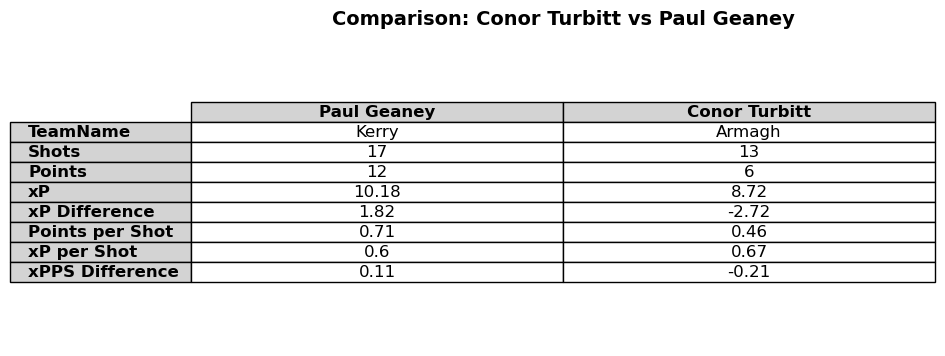

In [26]:
Player_options = md['PlayerName'].tolist()

Player_select1 = widgets.Combobox(
    placeholder='Select Player 1',
    options=Player_options,
    description='Player 1:',
    ensure_option=True,
    disabled=False
)

Player_select2 = widgets.Combobox(
    placeholder='Select Player 2',
    options=Player_options,
    description='Player 2:',
    ensure_option=True,
    disabled=False
)

compare_button = widgets.Button(description="Compare Players")

def compare_Players(Player1, Player2):
    clear_output(wait=True)  # Clear the previous output

    # Re-display the widgets to keep them visible after clearing output
    display(Player_select1, Player_select2, compare_button)
    
    if Player1 in md['PlayerName'].values and Player2 in md['PlayerName'].values:
        comparison_md = md[md['PlayerName'].isin([Player1, Player2])]
        comparison_md = comparison_md.set_index('PlayerName').transpose()

        fig, ax = plt.subplots(figsize=(8, 4))

        ax.axis('tight')
        ax.axis('off')

        table = ax.table(
            cellText=comparison_md.values,
            rowLabels=comparison_md.index,
            colLabels=comparison_md.columns,
            cellLoc='center',
            loc='center',
            colColours=['#f5f5f5'] * len(comparison_md.columns),
            rowColours=['#f5f5f5'] * len(comparison_md.index)
        )

        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.2, 1.2)

        for (i, j), cell in table.get_celld().items():
            if i == 0:
                cell.set_text_props(weight='bold', color='black')
                cell.set_facecolor('#d3d3d3')
            if j == -1:
                cell.set_text_props(weight='bold', color='black')
                cell.set_facecolor('#d3d3d3')

        plt.title(f'Comparison: {Player1} vs {Player2}', fontsize=14, fontweight='bold', pad=10)
        plt.show()
    else:
        print("Both Players must be selected from the list")

def on_button_clicked(b):
    compare_Players(Player_select1.value, Player_select2.value)

compare_button.on_click(on_button_clicked)

display(Player_select1, Player_select2, compare_button)


## Player Shot Maps

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

def shot_map(data):
    #shot_data = data[(data['Action'] == "point") | (data['Action'] == "free") | (data['Action'] == "fortyfive")
     #                | (data['Action'] == "blocked") | (data['Action'] == "fortyfive short") | (data['Action'] == "fortyfive wide") | (data['Action'] == "free short")
      #               | (data['Action'] == "free wide") | (data['Action'] == "goal") | (data['Action'] == "goal miss")
       #              | (data['Action'] == "offensive mark") | (data['Action'] == "penalty goal")
        #             | (data['Action'] == "post") | (data['Action'] == "short") | (data['Action'] == "wide")
         #           | (data['Action'] == "offensive mark wide") | (data['Action'] == "free post")]

    shot_data = data

    # Rest of the pitch lines...
    fig=plt.figure()
    fig.set_size_inches(7, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
  #  ly921 = [124,30] 
   # lx921 = [0,30]
    #plt.plot(lx921,ly921,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    # Prepare Arcs...
    
    plt.axis('off')

   # Separate shot data based on Placed_Ball
    placed_ball_data = shot_data[shot_data['Placed_Ball'] == 1]
    normal_data = shot_data[shot_data['Placed_Ball'] != 1]

    # Get the minimum and maximum xP_adv values from the combined data
    min_xp_adv = shot_data['xP_adv'].min()
    max_xp_adv = shot_data['xP_adv'].max()

    # Normalize the sizes based on the combined min and max xP_adv values
    norm = Normalize(vmin=min_xp_adv, vmax=max_xp_adv)

    # Plot scatter plot with circles for normal shots
    sns.scatterplot(
        data=normal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='o',
        size_norm=norm
    )

    # Plot scatter plot with hexagons for placed ball shots
    sns.scatterplot(
        data=placed_ball_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='h',
        size_norm=norm
    )

    # Set limits for x-axis
    plt.xlim(80, 145)

    # Calculate total number of shots
    total_shots = len(shot_data)
    # Calculate total score
    total_score = shot_data['Score'].sum()
    # Calculate sum of xP_Adv
    total_xp_adv = shot_data['xP_adv'].sum()
    avg_xp_per_shot = total_xp_adv / total_shots  # Calculate average expected points per shot

    # Display total shots, total score, and sum of xP_Adv under the graph
    plt.text(146, 75, f'Total Shots: {total_shots}', fontsize=12, fontweight='bold')
    plt.text(146, 70, f'Expected Points: {total_xp_adv:.2f}', fontsize=12, fontweight='bold')
    plt.text(146, 65, f'Total Points: {total_score}', fontsize=12, fontweight='bold')
    plt.text(146, 60, f'Expected Points per Shot: {avg_xp_per_shot:.2f}', fontsize=12, fontweight='bold')
    
    #for _, row in data.iterrows():
     #   plt.text(row['stand_x'], row['stand_y'], f"{row['Score']:.2f}", fontsize=8, ha='right', color='blue')


    # Add legend for color
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Miss'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Score')]
    ax.legend(handles=legend_elements, loc='best')

    # Add legend for shape and size
    legend_elements2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='From Play'),
                        Line2D([0], [0], marker='h', color='w', markerfacecolor='black', markersize=10, label='Placed Ball')]
    ax.legend(handles=legend_elements2, loc='best', bbox_to_anchor=(1, 0.5))

   # ax.set_title('Meath Shots', fontsize=16, fontweight='bold', color='black')

    #plt.savefig('Meath_Shots_v_Monaghan.png', dpi=300, bbox_inches='tight')

    plt.show()

In [28]:
# Assuming 'data' is your DataFrame containing shot data
players = df['PlayerName'].unique()

# Dropdown widget
player_dropdown = widgets.Dropdown(options=players, description='Select Player:', disabled=False)

def update_shot_map(player):
    player_data = df[df['PlayerName'] == player]
    shot_map(player_data)

# Event handler for dropdown change
widgets.interactive(update_shot_map, player=player_dropdown)


interactive(children=(Dropdown(description='Select Player:', options=('Pat Spillane', 'Sean Carrabine', 'Dylan…

# Player Timeline

In [29]:
pm = df.groupby(['PlayerName', 'TeamName', 'Date', 'Game', 'Opposition']).count()
pm = pm[['Action']]
pm = pm.reset_index()

pm1 = df.groupby(['PlayerName', 'TeamName', 'Date', 'Game', 'Opposition']).sum()

pm1 = pm1.reset_index()

pm1 = pm1[['Date', 'Game', 'PlayerName', 'TeamName', 'Opposition', 'xP_adv', 'Score']]


merged_pm = pd.merge(pm, pm1, on=['Date', 'PlayerName', 'TeamName', 'Game', 'Opposition'])

pmd = merged_pm.rename(columns={'Action': 'Shots'})
pmd = pmd.rename(columns={'xP_adv': 'xP'})

pmd = pmd[['Date', 'Game', 'PlayerName', 'TeamName', 'Opposition', 'Shots', 'Score', 'xP']]

pmd['xP Difference'] = pmd['Score'] - pmd['xP']

pmd['Opponent'] = pmd.apply(lambda row: f"{row['Opposition']} {row['Date'].strftime('%d-%b-%Y')}", axis=1)

pmd['xP'] = pmd['xP'].round(2)
pmd['xP Difference'] = pmd['xP Difference'].round(2)
pmd = pmd.rename(columns={'Score': 'Points'})

Dropdown(description='Player:', index=4, options=('Aaron Masterson', 'Adrian Spillane', 'Aidan Forker', 'Aidan…

Checkbox(value=True, description='Include Points')

Checkbox(value=True, description='Include XP')

Checkbox(value=True, description='Include Shots')

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_62115/4183863524.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(player_data['Opponent'], rotation=45)


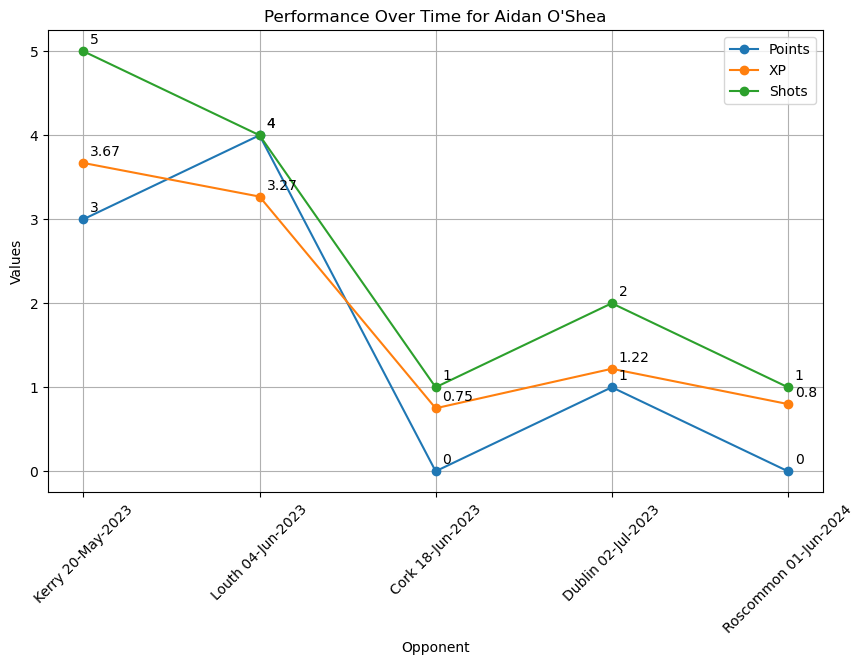

In [30]:



# Unique player options
player_options = pmd['PlayerName'].unique().tolist()

# Dropdown for player selection
player_select = widgets.Dropdown(
    options=player_options,
    description='Player:',
    ensure_option=True,
    disabled=False
)

# Checkboxes for including lines
include_Points = widgets.Checkbox(
    value=True,
    description='Include Points',
    disabled=False
)
include_xp = widgets.Checkbox(
    value=True,
    description='Include XP',
    disabled=False
)
include_shots = widgets.Checkbox(
    value=True,
    description='Include Shots',
    disabled=False
)

# Function to plot player performance
def plot_player_performance(change):
    clear_output(wait=True)
    display(player_select, include_Points, include_xp, include_shots)
    
    player = player_select.value
    player_data = pmd[pmd['PlayerName'] == player]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if include_Points.value:
        ax.plot(player_data['Opponent'], player_data['Points'], label='Points', marker='o')
        for i, txt in enumerate(player_data['Points']):
            ax.annotate(txt, (player_data['Opponent'].iloc[i], player_data['Points'].iloc[i]), 
                       textcoords="offset points", xytext=(5,5))

    if include_xp.value:
        ax.plot(player_data['Opponent'], player_data['xP'], label='XP', marker='o')
        for i, txt in enumerate(player_data['xP']):
            ax.annotate(txt, (player_data['Opponent'].iloc[i], player_data['xP'].iloc[i]), 
                       textcoords="offset points", xytext=(5,5))

    if include_shots.value:
        ax.plot(player_data['Opponent'], player_data['Shots'], label='Shots', marker='o')
        for i, txt in enumerate(player_data['Shots']):
            ax.annotate(txt, (player_data['Opponent'].iloc[i], player_data['Shots'].iloc[i]), 
                       textcoords="offset points", xytext=(5,5))

    ax.set_xlabel('Opponent')
    ax.set_ylabel('Values')
    ax.set_title(f'Performance Over Time for {player}')
    ax.legend()
    ax.grid(True)
    ax.set_xticklabels(player_data['Opponent'], rotation=45)
    
    plt.show()

# Update plot when the dropdown or checkboxes are changed
player_select.observe(plot_player_performance, names='value')
include_Points.observe(plot_player_performance, names='value')
include_xp.observe(plot_player_performance, names='value')
include_shots.observe(plot_player_performance, names='value')

# Display widgets
display(player_select, include_Points, include_xp, include_shots)

# Initial plot
plot_player_performance(None)
